#  **Land Slide Detection**




# **About Dataset**

Landslides are a natural phenomenon with devastating consequences, frequent in many parts of the world. Thousands of small and medium-sized ground movements follow earthquakes or heavy rainfalls. Landslides have become more damaging in recent years due to climate change, population growth, and unplanned urbanization in unstable mountain areas. Early landslide detection is critical for quick response and management of the consequences. Accurate detection provides information on the landslide's exact location and extent, which is necessary for landslide susceptibility modelling and risk assessment.

Recent advances in machine learning and computer vision combined with the growing availability of satellite imagery and computational resources have facilitated rapid progress in landslide detection. Landslide4Sense aims to promote research in this direction and challenges participants to detect landslides around the globe using multi-sensor satellite images. The images are collected from diverse geographical regions offering an important resource for remote sensing, computer vision, and machine learning communities.

## **1. Data Acquisition**

### **1.1.  Install Required Libraries**

In [ ]:
!pip install kaggle h5py numpy matplotlib

In [ ]:
# !pip install -U tensorflow

In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import load_model

### **1.2. Upload Kaggle API Key**

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aminbrahmi","key":"bcf6e984a33ba4ebf02db0a03ea09322"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


### **1.3. Download the Dataset**

In [ ]:
!kaggle datasets download -d tekbahadurkshetri/landslide4sense

Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/landslide4sense
License(s): other


### **1.4. Extract the Dataset**

In [ ]:
!unzip landslide4sense.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: TrainData/img/image_3558.h5  
  inflating: TrainData/img/image_3559.h5  
  inflating: TrainData/img/image_356.h5  
  inflating: TrainData/img/image_3560.h5  
  inflating: TrainData/img/image_3561.h5  
  inflating: TrainData/img/image_3562.h5  
  inflating: TrainData/img/image_3563.h5  
  inflating: TrainData/img/image_3564.h5  
  inflating: TrainData/img/image_3565.h5  
  inflating: TrainData/img/image_3566.h5  
  inflating: TrainData/img/image_3567.h5  
  inflating: TrainData/img/image_3568.h5  
  inflating: TrainData/img/image_3569.h5  
  inflating: TrainData/img/image_357.h5  
  inflating: TrainData/img/image_3570.h5  
  inflating: TrainData/img/image_3571.h5  
  inflating: TrainData/img/image_3572.h5  
  inflating: TrainData/img/image_3573.h5  
  inflating: TrainData/img/image_3574.h5  
  inflating: TrainData/img/image_3575.h5  
  inflating: TrainData/img/image_3576.h5  
  inflating: TrainDat

# **2. Data Understanding**

In [ ]:
import os

# List directories
dataset_dir = "/content"
train_dir = os.path.join(dataset_dir, "TrainData")
valid_dir = os.path.join(dataset_dir, "ValidData")
test_dir = os.path.join(dataset_dir, "TestData")

print("Train directory:", train_dir)
print("Valid directory:", valid_dir)
print("Test directory:", test_dir)

Train directory: /content/TrainData
Valid directory: /content/ValidData
Test directory: /content/TestData


In [ ]:
# List files in TrainData/img and TrainData/mask
train_img_dir = os.path.join(train_dir, "img")
train_mask_dir = os.path.join(train_dir, "mask")

train_img_files = sorted(os.listdir(train_img_dir))
train_mask_files = sorted(os.listdir(train_mask_dir))

print("Number of image files:", len(train_img_files))
print("Number of mask files:", len(train_mask_files))

# Check if the filenames match
for img_file, mask_file in zip(train_img_files, train_mask_files):
    img_id = img_file.split('_')[1].split('.')[0]
    mask_id = mask_file.split('_')[1].split('.')[0]
    if img_id != mask_id:
        print(f"Mismatch: {img_file} (image) vs {mask_file} (mask)")

Number of image files: 3799
Number of mask files: 3799


# **3. Data Visualization**

### **3.1. Load and Visualize an Image-Mask Pair**

Image shape: (128, 128, 14)
Mask shape: (128, 128)


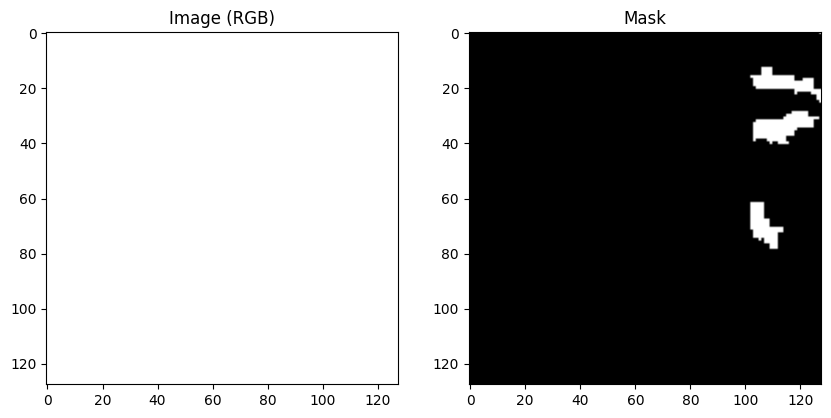

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Paths to the image and mask files
img_file = train_img_files[0]
mask_file = train_mask_files[0]

image_path = os.path.join(train_img_dir, img_file)
mask_path = os.path.join(train_mask_dir, mask_file)

# Load the image
with h5py.File(image_path, 'r') as f:
    image = np.array(f['img'])
    print(f"Image shape: {image.shape}")

# Load the mask
with h5py.File(mask_path, 'r') as f:
    mask = np.array(f['mask'])
    print(f"Mask shape: {mask.shape}")

# Visualize the image and mask
plt.figure(figsize=(10, 5))

# Display the first 3 channels of the image (assumed to be RGB)
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, :3])  # Use the first 3 channels for visualization
plt.title("Image (RGB)")

# Display the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.show()

###**3.2. Visualize Multiple Samples**

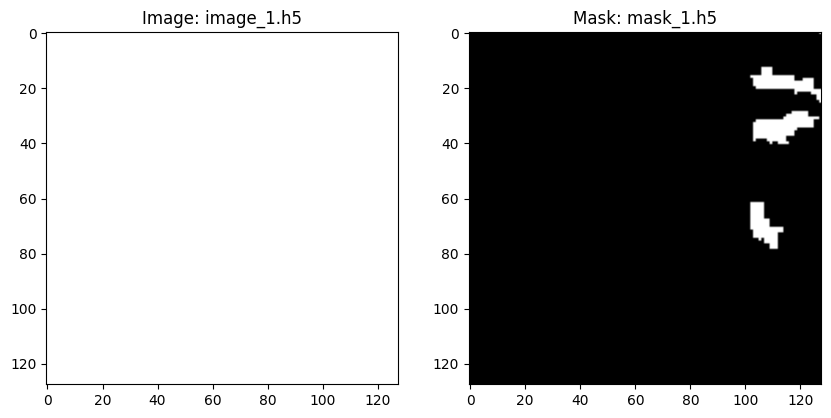

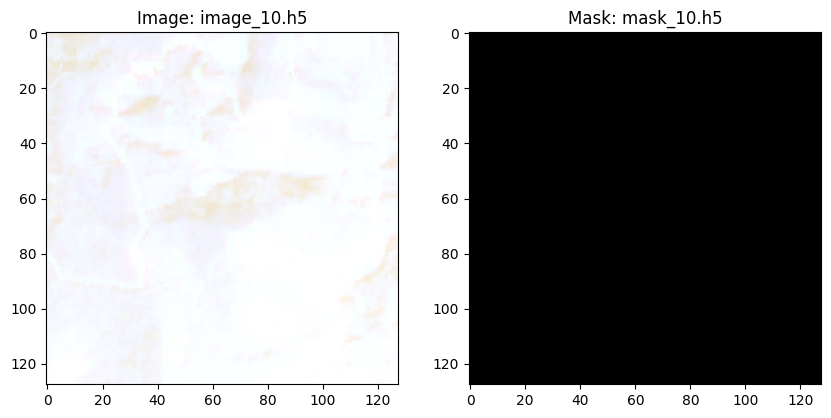

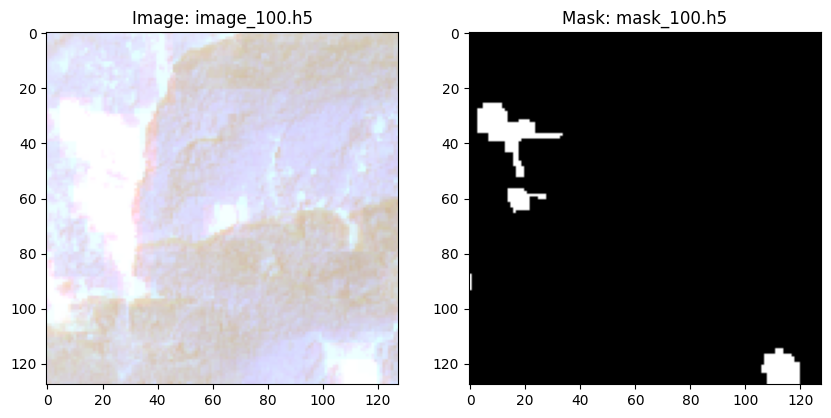

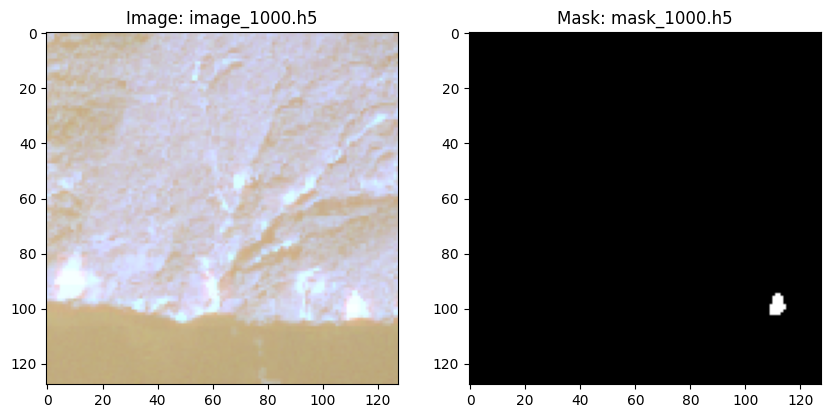

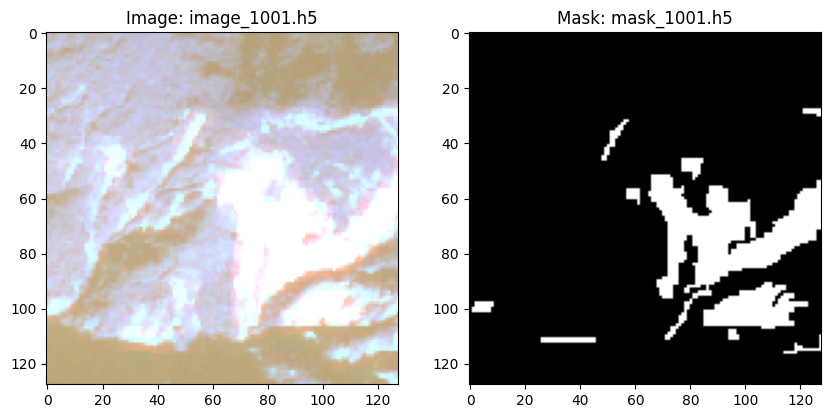

In [ ]:
for i in range(5):
    img_file = train_img_files[i]
    mask_file = train_mask_files[i]

    image_path = os.path.join(train_img_dir, img_file)
    mask_path = os.path.join(train_mask_dir, mask_file)

    # Load the image and mask
    with h5py.File(image_path, 'r') as f:
        image = np.array(f['img'])
    with h5py.File(mask_path, 'r') as f:
        mask = np.array(f['mask'])

    # Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[:, :, :3])  # Use the first 3 channels for visualization
    plt.title(f"Image: {img_file}")
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask: {mask_file}")
    plt.show()

### **3.3. Channel-wise Visualization**

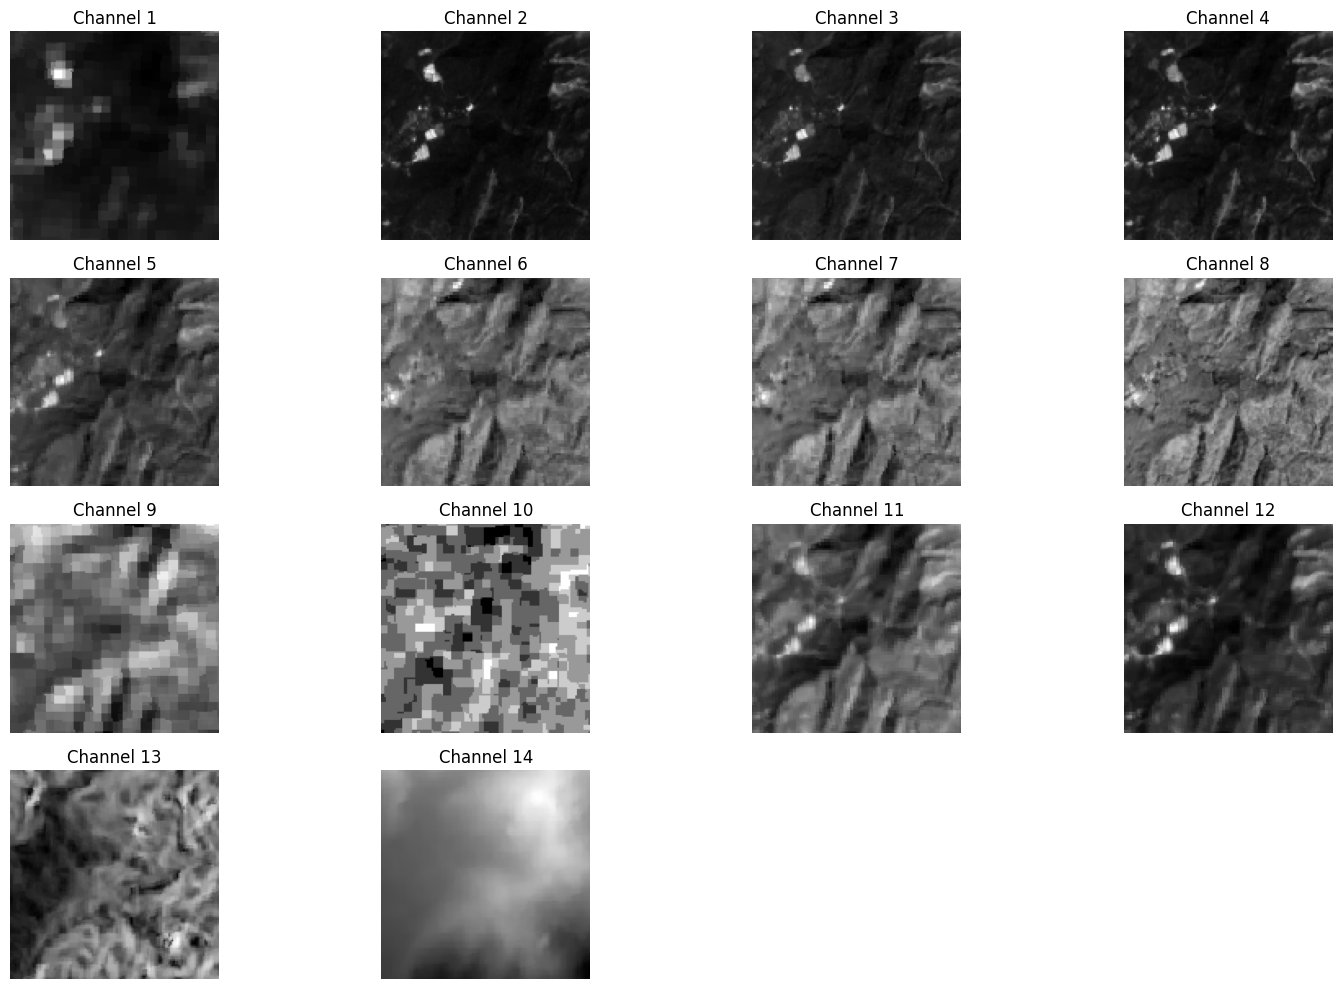

In [ ]:
# Load an image
img_file = train_img_files[0]
image_path = os.path.join(train_img_dir, img_file)
with h5py.File(image_path, 'r') as f:
    image = np.array(f['img'])

# Plot all 14 channels
plt.figure(figsize=(15, 10))
for i in range(14):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image[:, :, i], cmap='gray')
    plt.title(f"Channel {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### **3.4. Mask Distribution**

Landslide pixels: 405 (2.47%)
Non-landslide pixels: 15979 (97.53%)


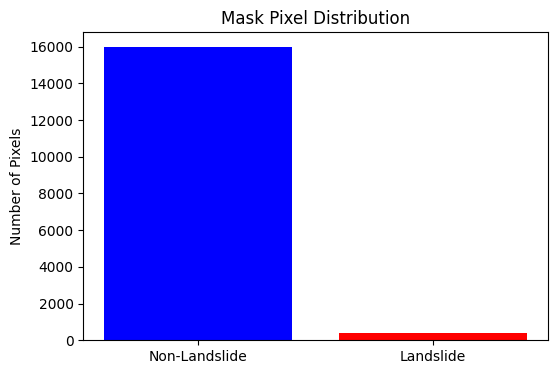

In [ ]:
#Analyze the distribution of landslide (1) vs. non-landslide (0) pixels in the mask.
# Load a mask
mask_file = train_mask_files[0]
mask_path = os.path.join(train_mask_dir, mask_file)
with h5py.File(mask_path, 'r') as f:
    mask = np.array(f['mask'])

# Calculate the percentage of landslide vs. non-landslide pixels
landslide_pixels = np.sum(mask == 1)
non_landslide_pixels = np.sum(mask == 0)
total_pixels = mask.size

print(f"Landslide pixels: {landslide_pixels} ({landslide_pixels / total_pixels * 100:.2f}%)")
print(f"Non-landslide pixels: {non_landslide_pixels} ({non_landslide_pixels / total_pixels * 100:.2f}%)")

# Plot the distribution
plt.figure(figsize=(6, 4))
plt.bar(['Non-Landslide', 'Landslide'], [non_landslide_pixels, landslide_pixels], color=['blue', 'red'])
plt.title("Mask Pixel Distribution")
plt.ylabel("Number of Pixels")
plt.show()

**Interpretation**
* Landslide Pixels: 405 pixels (2.47% of the total pixels) are labeled as landslides.

* Non-Landslide Pixels: 15,979 pixels (97.53% of the total pixels) are labeled as non-landslides.

### **3.5. Histograms of Pixel Intensities**

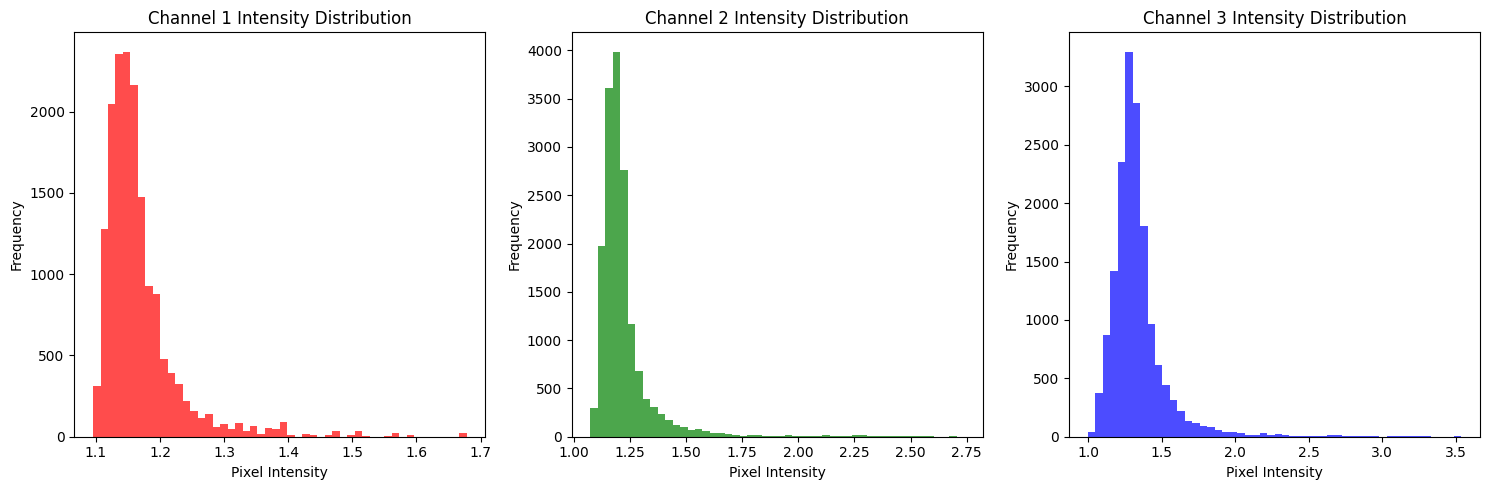

In [ ]:
# Plot histograms of pixel intensities for the image and mask to understand their distributions.
# Flatten the image and mask for histogram plotting
image_flat = image[:, :, :3].reshape(-1, 3)  # Use the first 3 channels
mask_flat = mask.ravel()

# Plot histograms for each channel
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(image_flat[:, i], bins=50, color=colors[i], alpha=0.7)
    plt.title(f"Channel {i + 1} Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Testing the dataset
path_single = r"TrainData/img/image_2000.h5"
path_single_mask = r'TrainData/mask/mask_2000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


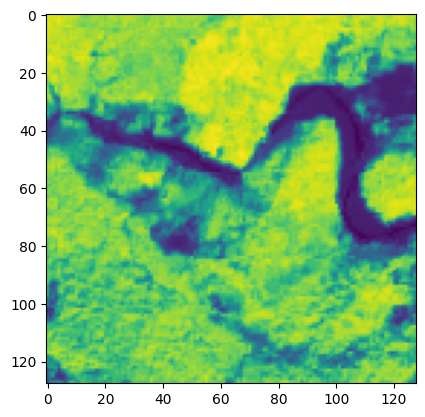

In [ ]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


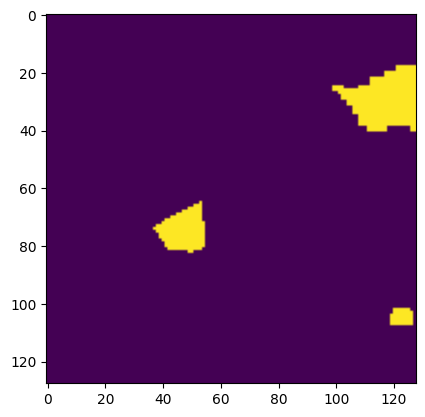

In [ ]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [ ]:
path_single = r"TrainData/img/image_10.h5"
path_single_mask = r'TrainData/mask/mask_1.h5'
TRAIN_PATH = r"TrainData/img/*.h5"
TRAIN_MASK = r'TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope


In [ ]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


0 TrainData/img/image_1.h5 TrainData/mask/mask_1.h5
1 TrainData/img/image_10.h5 TrainData/mask/mask_10.h5
2 TrainData/img/image_100.h5 TrainData/mask/mask_100.h5
3 TrainData/img/image_1000.h5 TrainData/mask/mask_1000.h5
4 TrainData/img/image_1001.h5 TrainData/mask/mask_1001.h5
5 TrainData/img/image_1002.h5 TrainData/mask/mask_1002.h5
6 TrainData/img/image_1003.h5 TrainData/mask/mask_1003.h5
7 TrainData/img/image_1004.h5 TrainData/mask/mask_1004.h5
8 TrainData/img/image_1005.h5 TrainData/mask/mask_1005.h5
9 TrainData/img/image_1006.h5 TrainData/mask/mask_1006.h5
10 TrainData/img/image_1007.h5 TrainData/mask/mask_1007.h5
11 TrainData/img/image_1008.h5 TrainData/mask/mask_1008.h5
12 TrainData/img/image_1009.h5 TrainData/mask/mask_1009.h5
13 TrainData/img/image_101.h5 TrainData/mask/mask_101.h5
14 TrainData/img/image_1010.h5 TrainData/mask/mask_1010.h5
15 TrainData/img/image_1011.h5 TrainData/mask/mask_1011.h5
16 TrainData/img/image_1012.h5 TrainData/mask/mask_1012.h5
17 TrainData/img/imag

<ipython-input-19-fefaee75c89a>:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 TrainData/img/image_2502.h5 TrainData/mask/mask_2502.h5
1672 TrainData/img/image_2503.h5 TrainData/mask/mask_2503.h5
1673 TrainData/img/image_2504.h5 TrainData/mask/mask_2504.h5
1674 TrainData/img/image_2505.h5 TrainData/mask/mask_2505.h5
1675 TrainData/img/image_2506.h5 TrainData/mask/mask_2506.h5
1676 TrainData/img/image_2507.h5 TrainData/mask/mask_2507.h5
1677 TrainData/img/image_2508.h5 TrainData/mask/mask_2508.h5
1678 TrainData/img/image_2509.h5 TrainData/mask/mask_2509.h5
1679 TrainData/img/image_251.h5 TrainData/mask/mask_251.h5
1680 TrainData/img/image_2510.h5 TrainData/mask/mask_2510.h5
1681 TrainData/img/image_2511.h5 TrainData/mask/mask_2511.h5
1682 TrainData/img/image_2512.h5 TrainData/mask/mask_2512.h5
1683 TrainData/img/image_2513.h5 TrainData/mask/mask_2513.h5
1684 TrainData/img/image_2514.h5 TrainData/mask/mask_2514.h5
1685 TrainData/img/image_2515.h5 TrainData/mask/mask_2515.h5
1686 TrainData/img/image_2516.h5 TrainData/mask/mask_2516.h5
1687 TrainData/img/image_2

<ipython-input-19-fefaee75c89a>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2265 TrainData/img/image_3037.h5 TrainData/mask/mask_3037.h5
2266 TrainData/img/image_3038.h5 TrainData/mask/mask_3038.h5
2267 TrainData/img/image_3039.h5 TrainData/mask/mask_3039.h5
2268 TrainData/img/image_304.h5 TrainData/mask/mask_304.h5
2269 TrainData/img/image_3040.h5 TrainData/mask/mask_3040.h5
2270 TrainData/img/image_3041.h5 TrainData/mask/mask_3041.h5
2271 TrainData/img/image_3042.h5 TrainData/mask/mask_3042.h5
2272 TrainData/img/image_3043.h5 TrainData/mask/mask_3043.h5
2273 TrainData/img/image_3044.h5 TrainData/mask/mask_3044.h5
2274 TrainData/img/image_3045.h5 TrainData/mask/mask_3045.h5
2275 TrainData/img/image_3046.h5 TrainData/mask/mask_3046.h5
2276 TrainData/img/image_3047.h5 TrainData/mask/mask_3047.h5
2277 TrainData/img/image_3048.h5 TrainData/mask/mask_3048.h5
2278 TrainData/img/image_3049.h5 TrainData/mask/mask_3049.h5
2279 TrainData/img/image_305.h5 TrainData/mask/mask_305.h5
2280 TrainData/img/image_3050.h5 TrainData/mask/mask_3050.h5
2281 TrainData/img/image_305

## Testing min, max values in train data

In [ ]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

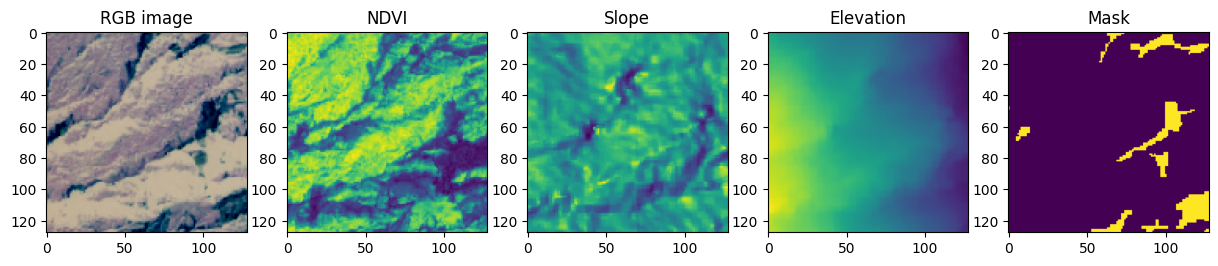

In [ ]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

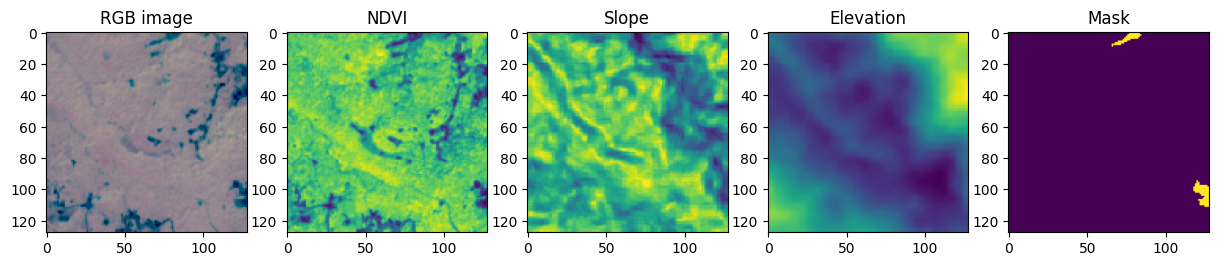

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

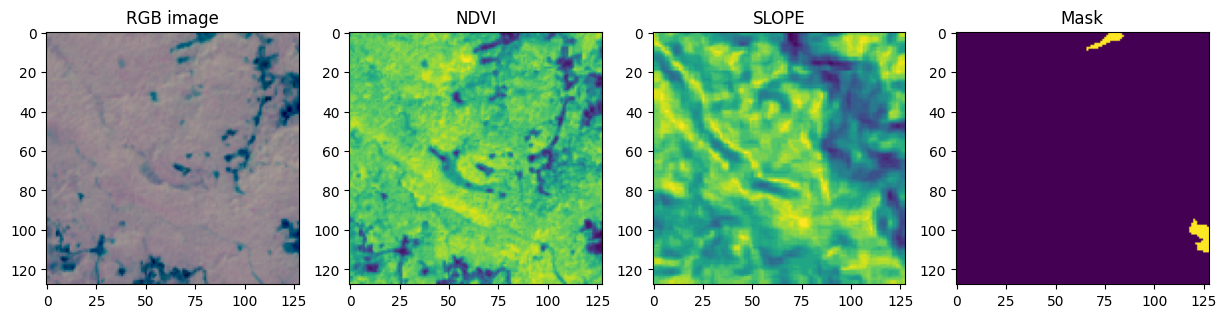

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# CNN

In [ ]:
from utils import recall_m, precision_m, f1_m
import tensorflow as tf
import os

def basic_cnn_segmentation_model(input_shape=(128, 128, 6)):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    # Bottleneck
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', f1_m, precision_m, recall_m]
    )
    return model

In [38]:
# Create and compile the model
model = basic_cnn_segmentation_model(input_shape=(128, 128, 6))

# ✅ Setup saving and early stopping
checkpoint_dir = "/content/drive/MyDrive"
os.makedirs(checkpoint_dir, exist_ok=True)

checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "basic_cnn_epoch_{epoch:02d}.keras"),
    save_freq="epoch",
    monitor="val_f1_m",
    verbose=1,
    save_best_only=False,
    mode="max"
)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_f1_m',
    patience=10,
    verbose=1,
    mode='max'
)

callbacks = [earlyStopping, checkpointer]

# ✅ Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=20,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

# ✅ Save the model
model.save("/content/drive/MyDrive/landslide_cnnmodel.keras")

Epoch 1/20


KeyboardInterrupt: 

In [42]:
from tensorflow.keras.models import load_model
from utils import f1_m, precision_m, recall_m  # ⬅ import all three

model = load_model(
    '/content/drive/MyDrive/landslide_cnnmodel.keras',
    custom_objects={
        'f1_m': f1_m,
        'precision_m': precision_m,
        'recall_m': recall_m
    }
)


# Unet Model

In [ ]:
from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

In [ ]:
model = unet_model(128, 128, 6)
# model.summary()
import os

# Define your save path in Drive
checkpoint_dir = "/content/drive/MyDrive"
os.makedirs(checkpoint_dir, exist_ok=True)

checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "model_epoch_{epoch:02d}.keras"),
    save_freq="epoch",  # Save every epoch
    monitor="val_f1_m",
    verbose=1,
    save_best_only=False,  # Save every epoch, not just the best
    mode="max"
)

earlyStopping = tf.keras.callbacks.EarlyStopping(  # <-- No extra indentation here
    monitor='val_f1_m',
    patience=10,
    verbose=1,
    mode='max'
)

callbacks = [
    earlyStopping,
    checkpointer
]

history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=20,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

model.save("/content/drive/MyDrive/landslide_model.keras")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_41']
Received: inputs=Tensor(shape=(None, 128, 128, 6))
  warnings.warn(msg)



Epoch 1: saving model to /content/drive/MyDrive/model_epoch_01.keras
190/190 - 611s - 3s/step - accuracy: 0.9759 - f1_m: 0.2927 - loss: 0.0834 - precision_m: 0.5015 - recall_m: 0.2467 - val_accuracy: 0.9831 - val_f1_m: 0.5564 - val_loss: 0.0446 - val_precision_m: 0.6344 - val_recall_m: 0.5213
Epoch 2/20

Epoch 2: saving model to /content/drive/MyDrive/model_epoch_02.keras
190/190 - 637s - 3s/step - accuracy: 0.9824 - f1_m: 0.5324 - loss: 0.0460 - precision_m: 0.6922 - recall_m: 0.4630 - val_accuracy: 0.9851 - val_f1_m: 0.5773 - val_loss: 0.0380 - val_precision_m: 0.7033 - val_recall_m: 0.5058
Epoch 3/20

Epoch 3: saving model to /content/drive/MyDrive/model_epoch_03.keras
190/190 - 600s - 3s/step - accuracy: 0.9840 - f1_m: 0.5750 - loss: 0.0413 - precision_m: 0.7154 - recall_m: 0.4999 - val_accuracy: 0.9866 - val_f1_m: 0.6254 - val_loss: 0.0350 - val_precision_m: 0.7206 - val_recall_m: 0.5644
Epoch 4/20

Epoch 4: saving model to /content/drive/MyDrive/model_epoch_04.keras
190/190 - 61

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03344762697815895 0.9864790439605713 0.6740848422050476 0.7790459990501404 0.6020885109901428


In [46]:
from tensorflow.keras.models import load_model
from utils import f1_m, precision_m, recall_m  # ⬅ import all three

model = load_model(
    '/content/drive/MyDrive/landslide_model.keras',
    custom_objects={
        'f1_m': f1_m,
        'precision_m': precision_m,
        'recall_m': recall_m
    }
)


# Prediction

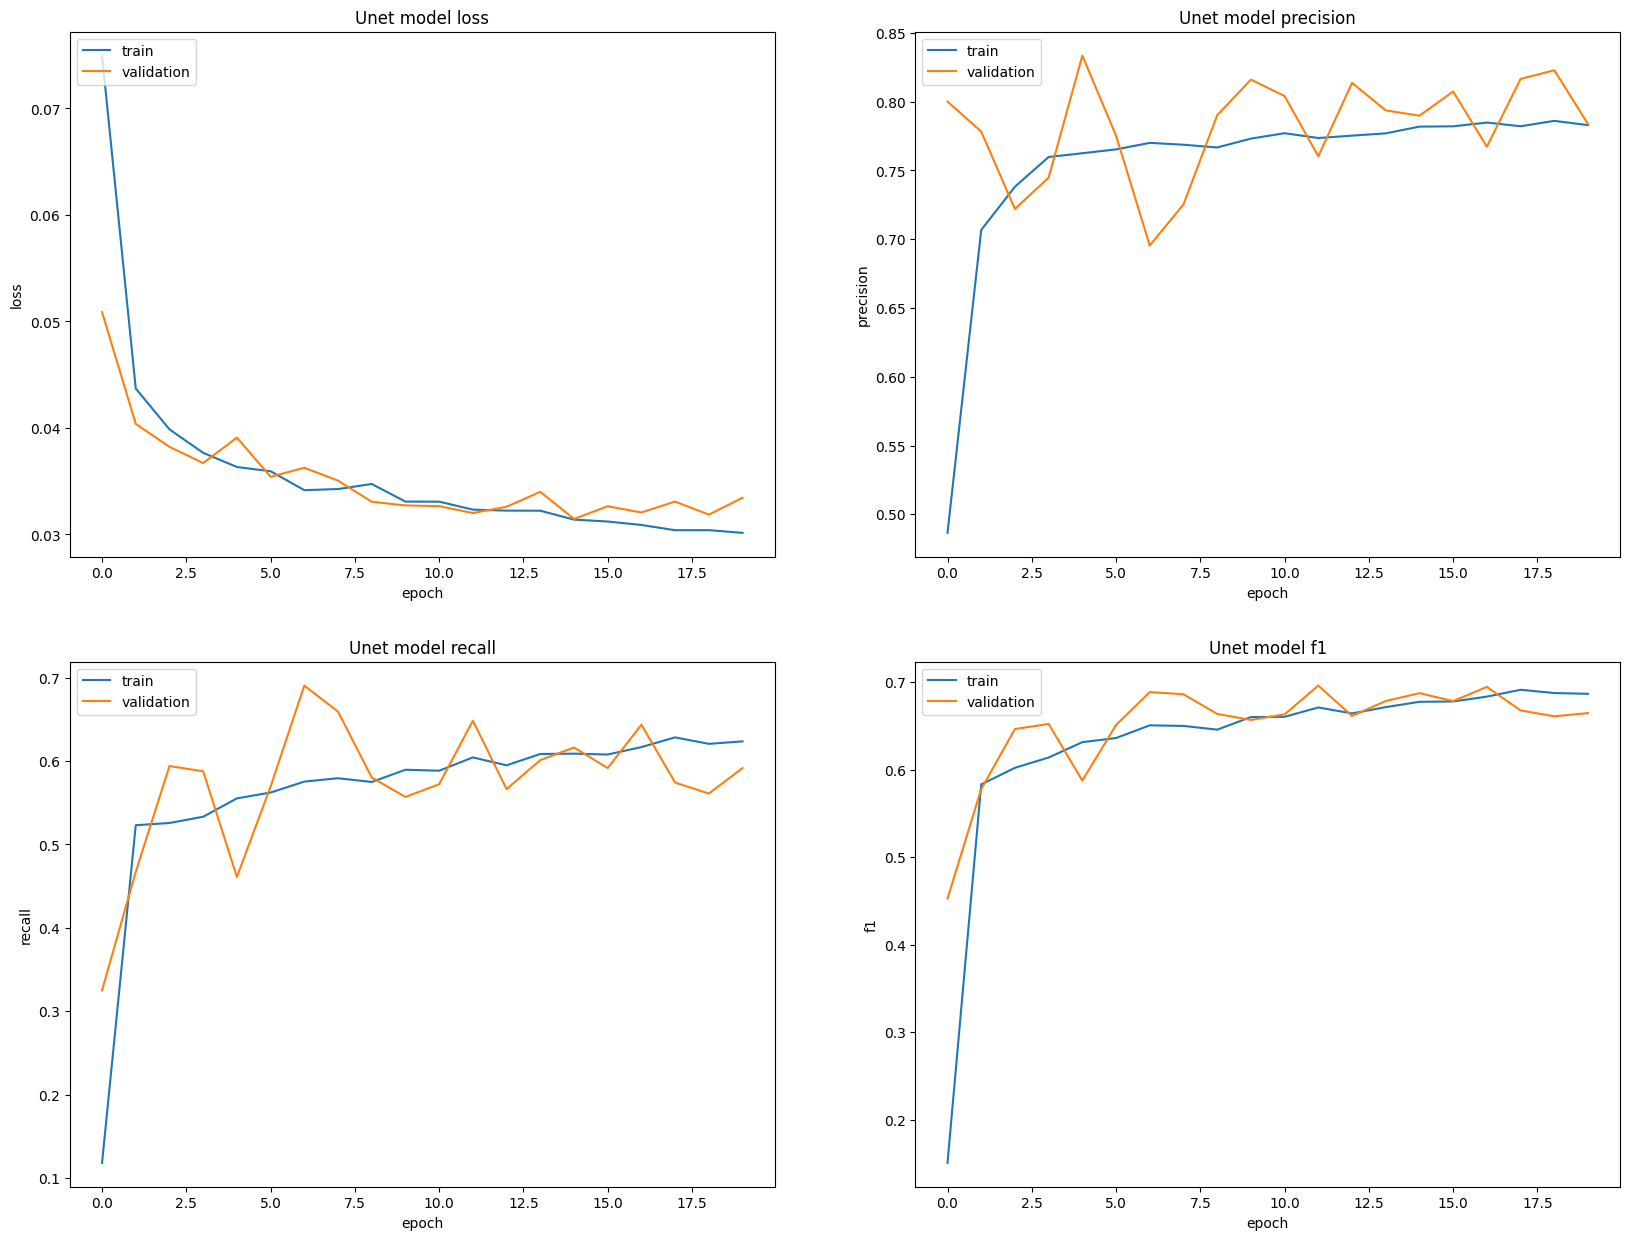

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

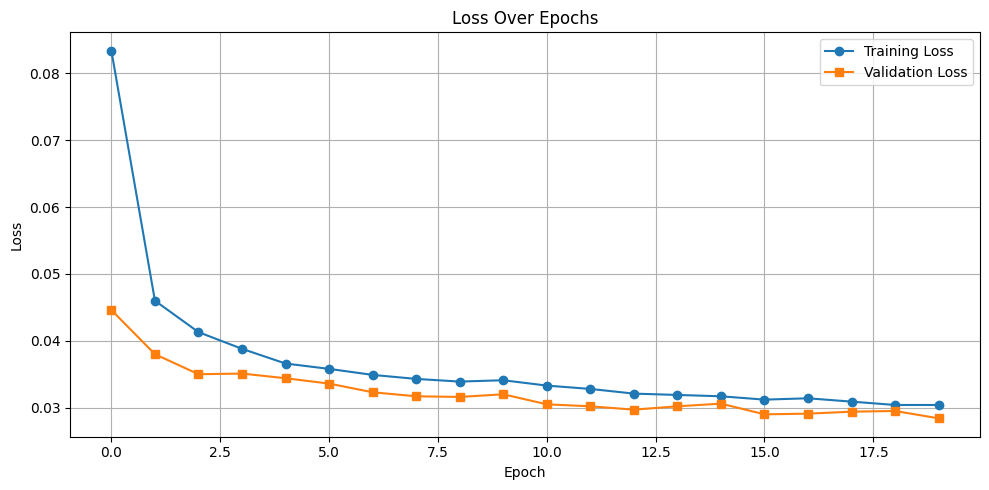

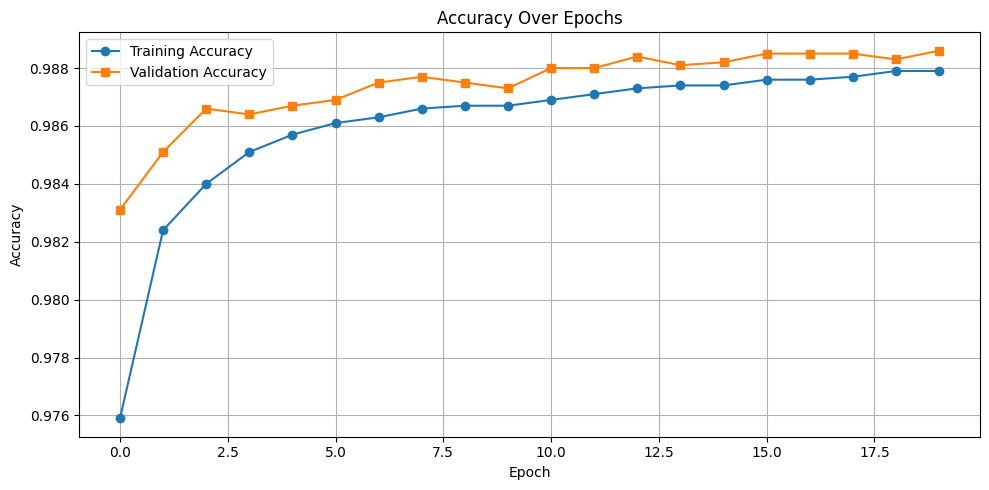

In [44]:
# Re-import libraries due to kernel reset
import matplotlib.pyplot as plt

# Re-declare history data
history_data = {
    'accuracy': [
        0.9759, 0.9824, 0.9840, 0.9851, 0.9857, 0.9861, 0.9863, 0.9866, 0.9867, 0.9867,
        0.9869, 0.9871, 0.9873, 0.9874, 0.9874, 0.9876, 0.9876, 0.9877, 0.9879, 0.9879
    ],
    'val_accuracy': [
        0.9831, 0.9851, 0.9866, 0.9864, 0.9867, 0.9869, 0.9875, 0.9877, 0.9875, 0.9873,
        0.9880, 0.9880, 0.9884, 0.9881, 0.9882, 0.9885, 0.9885, 0.9885, 0.9883, 0.9886
    ],
    'loss': [
        0.0834, 0.0460, 0.0413, 0.0388, 0.0366, 0.0358, 0.0349, 0.0343, 0.0339, 0.0341,
        0.0333, 0.0328, 0.0321, 0.0319, 0.0317, 0.0312, 0.0314, 0.0309, 0.0304, 0.0304
    ],
    'val_loss': [
        0.0446, 0.0380, 0.0350, 0.0351, 0.0344, 0.0336, 0.0323, 0.0317, 0.0316, 0.0320,
        0.0305, 0.0302, 0.0297, 0.0302, 0.0306, 0.0290, 0.0291, 0.0294, 0.0295, 0.0284
    ]
}

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_data['loss'], label='Training Loss', marker='o')
plt.plot(history_data['val_loss'], label='Validation Loss', marker='s')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_data['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step


Text(0.5, 1.0, 'Training Image')

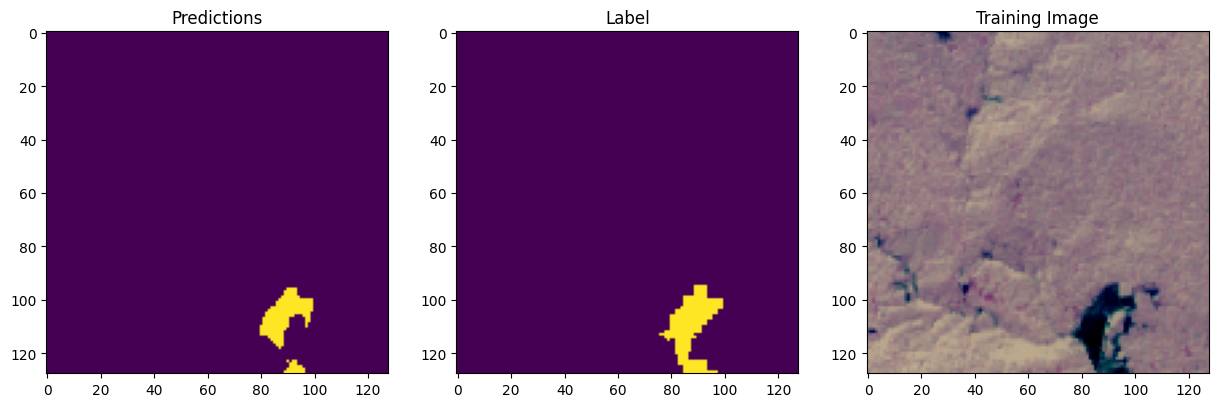

In [48]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data

In [49]:
import h5py
import numpy as np
import glob

# Define the path to your images
validation_url = '/content/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

# Initialize the VAL_XX array with the correct shape
VAL_XX = np.zeros((len(img_val), 128, 128, 6))  # Corrected shape based on the number of images

# Loop through the images to process them
for i, img_path in enumerate(img_val):
    with h5py.File(img_path, 'r') as hdf:
        # Load the data
        data = np.array(hdf['img'])

        # Check if the data has the expected shape
        if data.shape != (128, 128, 14):
            print(f"⚠️ Skipping {img_path}: wrong shape {data.shape}")
            continue

        # Normalize the data (handle NaN values, normalization)
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))

        # Populate the VAL_XX array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        VAL_XX[i, :, :, 3] = data_ndvi  # NDVI
        VAL_XX[i, :, :, 4] = 1 - data[:, :, 13] / mid_slope  # SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Now check the min and max for each channel
for ch in range(6):
    print(f"Channel {ch}: min={VAL_XX[:, :, :, ch].min()}, max={VAL_XX[:, :, :, ch].max()}")


<ipython-input-49-fe3ec6ada4f3>:31: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


Channel 0: min=-1.0, max=1.0
Channel 1: min=-0.48758663654428536, max=1.0
Channel 2: min=-0.3945451836369025, max=1.0
Channel 3: min=nan, max=nan
Channel 4: min=-1.6689530490288487, max=1.0
Channel 5: min=-1.0, max=1.0


## Prediction for validation data

In [50]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


(245, 128, 128, 1)

## Visualization of validation image

Text(0.5, 1.0, 'Training Image')

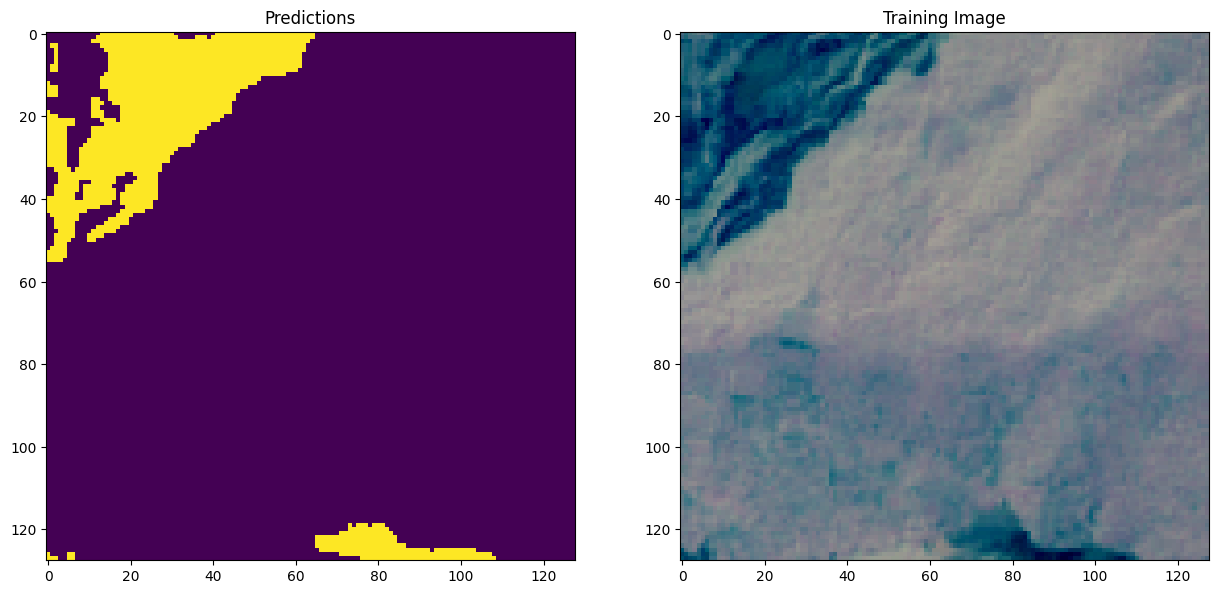

In [56]:
img = 138
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

<ipython-input-41-267b74094f3f>:32: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


Channel 0: min=-1.0, max=1.0
Channel 1: min=-0.8436173972530498, max=1.0
Channel 2: min=-0.4438028740395634, max=1.0
Channel 3: min=nan, max=nan
Channel 4: min=-2.5674593879881753, max=1.0
Channel 5: min=-1.0, max=1.0
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step


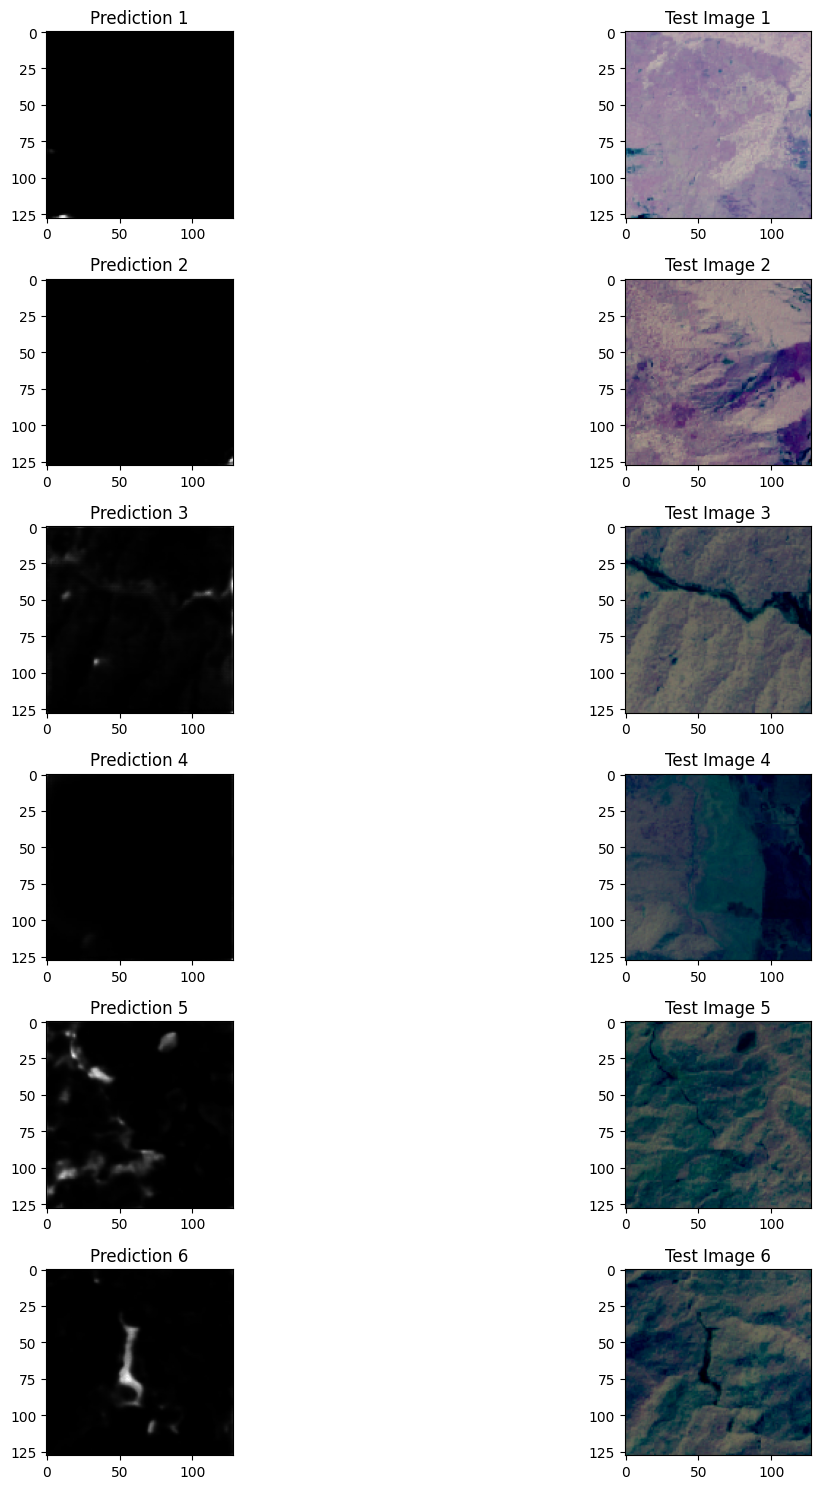

In [ ]:
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt

# Define the path to your test images
test_url = '/content/TestData/img/*.h5'
img_test = sorted(glob.glob(test_url))

# Initialize the TEST_XX array with the correct shape (based on number of test images)
TEST_XX = np.zeros((len(img_test), 128, 128, 6))  # Adjust shape if needed

# Loop through the test images to process them
for i, img_path in enumerate(img_test):
    with h5py.File(img_path, 'r') as hdf:
        # Load the data
        data = np.array(hdf['img'])

        # Check if the data has the expected shape
        if data.shape != (128, 128, 14):
            print(f"⚠️ Skipping {img_path}: wrong shape {data.shape}")
            continue

        # Normalize the data (handle NaN values, normalization)
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))

        # Populate the TEST_XX array
        TEST_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        TEST_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        TEST_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        TEST_XX[i, :, :, 3] = data_ndvi  # NDVI
        TEST_XX[i, :, :, 4] = 1 - data[:, :, 13] / mid_slope  # SLOPE
        TEST_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Check the min and max values for each channel
for ch in range(6):
    print(f"Channel {ch}: min={TEST_XX[:, :, :, ch].min()}, max={TEST_XX[:, :, :, ch].max()}")

# Now, use your trained model to make predictions on the test data
predictions = model.predict(TEST_XX)

# Visualize multiple images and their predictions
num_images = 6  # Number of images to show, you can adjust this
fig, axes = plt.subplots(num_images, 2, figsize=(15, 15))

for i in range(num_images):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    # Display Prediction
    ax1.imshow(predictions[i, :, :, 0], cmap='gray')
    ax1.set_title(f"Prediction {i+1}")

    # Display corresponding Test Image
    ax2.imshow(TEST_XX[i, :, :, 0:3])
    ax2.set_title(f"Test Image {i+1}")

plt.tight_layout()
plt.show()
